In [ ]:
import LCTIMSpy 
import importlib
from LCTIMSpy.LCTIMSpy import *
importlib.reload(LCTIMSpy.LCTIMSpy)
from LCTIMSpy.LCTIMSpy import lctims

# path to data
paths = {
    "RH5956" : r"X:\peaks\data\Samuel\20240707ISOASP\RH_0325_cid_tims_Slot1-19_1_5956.d", 
    "RH5957" : r"X:\peaks\data\Samuel\20240707ISOASP\RH_0325_cid_tims_Slot1-19_1_5957.d", 
    "RH5960" : r"X:\peaks\data\Samuel\20240707ISOASP\RH_0325_cid_tims_Slot1-19_1_5960.d"
}

# Initialize TdfData objects for each file.
rh_tdf_data_dict = {
    sample_id: lctims.create_tdf_data(
        path=path,
        tdf_sdk=dll,
        pressure_compensation_strategy=PressureCompensationStrategy.PerFramePressureCompensation,
        sql_chunksize=500
    )
    for sample_id, path in paths.items()
}
#Define a uniform chunk size for all samples.
chunk_size = 100
# Extract LC–MS data from each TdfData object using the same chunk size.
rh_lcms_data_dict = {}
for sample_id, tdf_obj in rh_tdf_data_dict.items():
    rh_lcms_data_dict[sample_id] = extract_lcms_tdf_data(
        tdf_data=tdf_obj,
        mode='profile', profile_bins=0.01,
        chunk_size=chunk_size, mobility_bin_width=0.002
    )



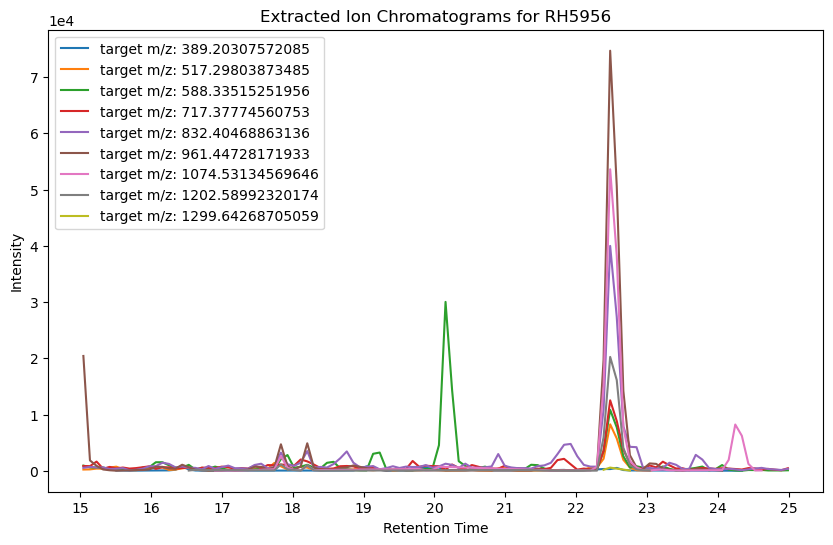

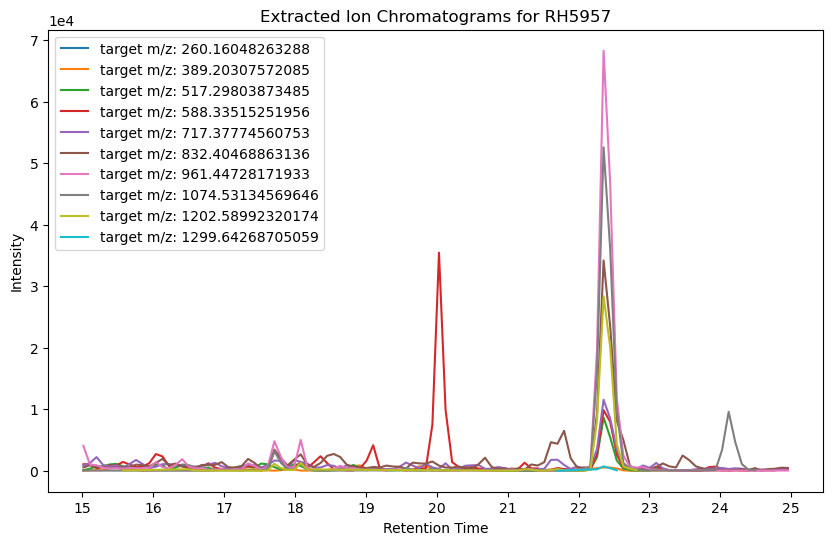

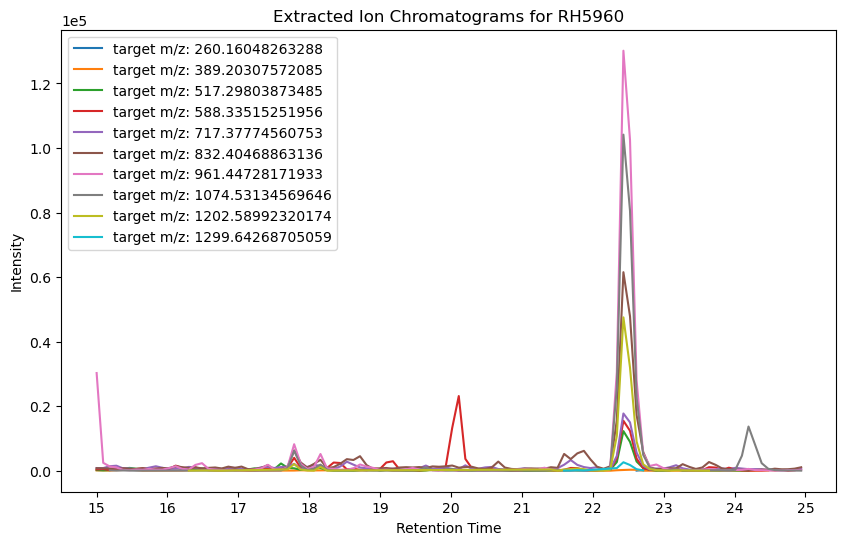

No mobilogram data for target m/z 260.16048263288 in RH5956
No mobilogram data for target m/z 147.07641865575 in RH5956
No mobilogram data for target m/z 260.16048263288 in RH5957
No mobilogram data for target m/z 147.07641865575 in RH5957
No mobilogram data for target m/z 147.07641865575 in RH5960


NameError: name 'cer_lcms_data_dict' is not defined

In [11]:
#get fragment mz values from peptide sequence, add "(-.098)" for amidated residues 
seq = "SPQLEDEAKELQ"
fragments_df = calculate_fragment_mz(peptide=seq, charge_states=[1, 2], fragments_to_save=["y1+", "y2+", "b1+", "b2+"])

#Plot EIC of fragment ions in for each sample 
plot_chromatograms(df=rh_lcms_data_dict,
                               mz_tolerance= 0.02,overlay=True,retention_time_range=(15,25),
                               target_mzs=fragments_df["y1+"], major_ticks=1.0,
                              )

#plot interactive chromatogram for fragment ions 
pio.renderers.default = "browser"  
plot_interactive_chromatograms(df=rh_lcms_data_dict,
                               mz_tolerance= 0.02,overlay=True,
                               retention_time_range=[15, 25],
                               target_mzs=fragments_df["y1+"]
                      );
# Plot mobilgrams of target+mz or fragment ions at defined retention time for bothe interactive and not interactive 
process_mobilogram_interactive_plots(lcms_data_dict=rh_lcms_data_dict, save_plots=True, 
                        target_mzs=fragments_df["y1+"], 
                          rt_ranges=[(17.5, 17.9), (22.2, 22.7)],normalize=True,
                                        mz_tolerance=0.02, apply_smoothing=False, sigma=1, overlay=True)
#Exctract and calculate mobility difference of peptide isomers
mob_diff_spqr = extract_and_calculate_mobility_difference_multi(df_list=list(cer_lcms_data_dict.values()),
                                          target_mzs=fragments_df["y1+"], 
                                           rt_ranges=[(17.5, 17.9), (22.2, 22.7)], intensity_threshold=100,
                                        mz_tolerance=0.02, apply_smoothing=True, sigma=1)

#statistically compare mobilities of fragments at retentiontion time of isomeric peaks. 
#Note: metric = mobility_difference or peak_mobility difference, where mobility difference is the difference of weighted sum average 
#of the mobility peaks and peak_mobility difference is the difference between the maximum mobility value of target_mz (fragment ions)
#for each retention time. 
compare_targetmz_differences_with_boxplot(df_list=dict(list(rh_lcms_data_dict.items())),
                         target_mzs=fragments_df["y1+"], 
                         rt_ranges=[(17.5, 17.9), (22.2, 22.7)],apply_correction=False,
                         mz_tolerance=0.01, apply_smoothing=True, sigma=0.5, metric="peak_mobility_difference")
    

In [15]:
from LCTIMSpy.lctims.py import calculate_fragment_mz, calculate_precursor_mz



ModuleNotFoundError: No module named 'LCTIMSpy.lctims'